# Ejercicio de clase

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# DAtos
d1 = [(0.5, 1.0, 0),
     (1.2, 2.0, 0),
     (2.5, 3.2, 0),
     (3.0, 4.0, 0),
     (4.2, 5.6, 0)]
d1 = np.array(d1)

d2 = [(1.0, 3.5, 1),
     (1.7, 4.0, 1),
     (2.2, 4.6, 1),
     (3.5, 6.0, 1),
     (4.1, 6.5, 1)]
d2 = np.array(d2)

In [63]:

def condicion_fin(D, w):
    error = []
    
    for data in D:
        y = data[-2]
        x = np.append(data[0:-2], 1)
        
        sigma = 0
        for i in range(len(x)):
            sigma += x[i]*w[i]
        sigma += w[-1]
        error.append(abs(y - sigma))
        
    return np.mean(error)
        
    
    

def perceptron(D, nu, g, gp):
    n = len(D[0]) -1
    # pesos
    w = np.array(np.random.randint(-3000, 3001, n)/300)
    temp_w = []
    
    for _ in range(100000):
        temp_w.append(w)
        for data in D:
            y = data[-2]
            x = np.append(data[0:-2], 1)
            
            i_n = 0
            for i in range(n):
                i_n += w[i]*x[i]
            o = g(i_n)
                
            for k in range(n):
                w[i] = w[i] + nu*(y - o)* gp(i_n)*x[i]
                
        if condicion_fin(D, w) < 0.01:
            print(_)
            break
    
    plt.plot(D[:,0], D[:,0], 'o')
    
    aprox = lambda x: x*w[0] + w[1]
    paso = 10
    xs = np.linspace( min(D[:,0]), max(D[:,1]), paso, True)
    plt.plot(xs, [aprox(x) for x in xs])
    
    return w, temp_w

array([-1.13666667, -5.81773773])

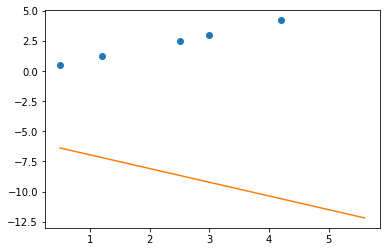

In [65]:
# Inputs
nu = 0.001
g = lambda x: 1/(1 - np.e**(-x))
gp = lambda x: -np.e**x/(-1 + np.e**x)**2

_, __ = perceptron(d1, nu, g, gp)
_